In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv("C:/Users/sgrka/OneDrive/Desktop/Apple watch data/Before_Clustering.csv")

In [12]:

# Check the first few rows of the DataFrame to verify the data
print("Original DataFrame:")
print(df.head())

Original DataFrame:
   PhysicalActivityIndex  CardiovascularFitnessIndex  MobilityAndBalanceIndex  \
0               0.084535                    0.004453                 0.036928   
1               0.044098                    0.035765                 0.025685   
2               0.046754                    0.096174                -0.003237   
3               0.085333                    0.034057                 0.029118   
4               0.087188                    0.001049                 0.040288   

   SedentaryBehaviorIndex  EnvironmentalStressIndex  Unnamed: 5  
0                0.069207                  0.004943         NaN  
1                0.030967                  0.571619         NaN  
2                0.212982                  0.701292         NaN  
3                0.033689                  0.783399         NaN  
4                0.096653                  0.834235         NaN  


In [13]:
# Check the shape of the DataFrame
print("Shape of DataFrame:", df.shape)

# Ensure no extra rows or columns are added
print("Columns in DataFrame:", df.columns)

Shape of DataFrame: (30, 6)
Columns in DataFrame: Index(['PhysicalActivityIndex', 'CardiovascularFitnessIndex',
       'MobilityAndBalanceIndex', 'SedentaryBehaviorIndex',
       'EnvironmentalStressIndex', 'Unnamed: 5'],
      dtype='object')


In [5]:
from sklearn.cluster import KMeans

# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(df)

# Get the cluster assignments
df['cluster'] = kmeans.labels_

# Check the clusters
print("DataFrame with cluster assignments:")
print(df.head())


C:\Users\sgrka\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Separate the data into two clusters
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]

# Save the clusters into two separate Excel files
output_dir = "C:/Users/sgrka/Downloads/"
cluster_0.to_excel(output_dir + "cluster_0.xlsx", index=False)
cluster_1.to_excel(output_dir + "cluster_1.xlsx", index=False)

print("Clusters have been saved to 'C:/Users/sgrka/Downloads/cluster_0.xlsx' and 'C:/Users/sgrka/Downloads/cluster_1.xlsx'")


In [ ]:
sns.pairplot(df, hue='cluster', palette='viridis')
plt.show()


Silhouette Score: 0.5635726008344183


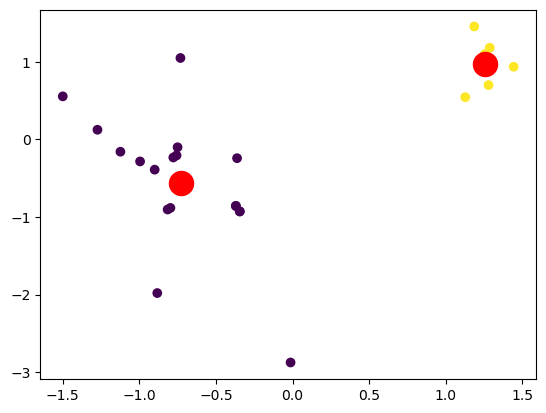

Clusters have been saved to 'C:/Users/sgrka/Downloads/clusters.xlsx'


In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("C:/Users/sgrka/OneDrive/Desktop/Apple watch data/Before_Clustering.csv")

# Assuming your data is in a DataFrame called data with 5 columns for the 5 variables
data_values = data.values

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Step 2: Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Step 3: Evaluate Clustering
sil_score = silhouette_score(data_scaled, clusters)
print(f'Silhouette Score: {sil_score}')

# Step 4: Visualize the clusters (optional, using 2D projection)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

# Separate the data into two clusters
cluster_0 = data[data['Cluster'] == 0]
cluster_1 = data[data['Cluster'] == 1]

# Save the clusters into one Excel file with separate sheets
output_file = "C:/Users/sgrka/Downloads/clusters.xlsx"

with pd.ExcelWriter(output_file) as writer:
    cluster_0.to_excel(writer, sheet_name='Cluster_0', index=False)
    cluster_1.to_excel(writer, sheet_name='Cluster_1', index=False)

print(f"Clusters have been saved to '{output_file}'")


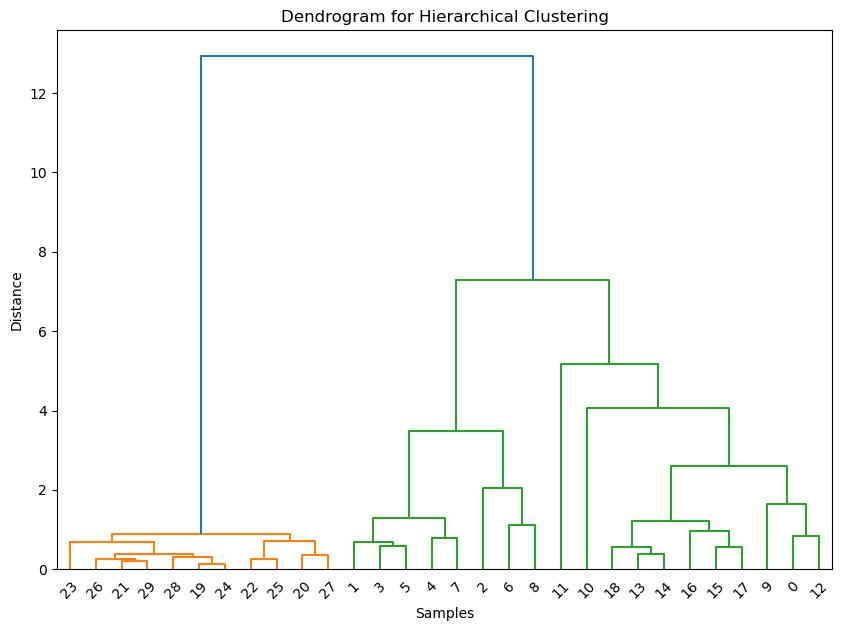

Clusters have been saved to 'C:/Users/sgrka/Downloads/hierarchical_clusters.xlsx'


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
data = pd.read_csv("C:/Users/sgrka/OneDrive/Desktop/Apple watch data/Before_Clustering.csv")

# Assuming your data is in a DataFrame called data with 5 columns for the 5 variables
data_values = data.values

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Step 2: Check for NaN or infinite values and handle them
if not np.all(np.isfinite(data_scaled)):
    data_scaled = np.nan_to_num(data_scaled)  # Convert NaNs to 0 and inf values to large finite numbers

# Step 3: Perform Hierarchical Clustering using Ward's method
Z = linkage(data_scaled, method='ward')

# Step 4: Plot the Dendrogram (optional)
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Step 5: Assign cluster labels - Assuming you want 2 clusters
clusters = fcluster(Z, t=2, criterion='maxclust')

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

# Separate the data into two clusters
cluster_1 = data[data['Cluster'] == 1]
cluster_2 = data[data['Cluster'] == 2]

# Save the clusters into one Excel file with separate sheets
output_file = "C:/Users/sgrka/Downloads/hierarchical_clusters.xlsx"

with pd.ExcelWriter(output_file) as writer:
    cluster_1.to_excel(writer, sheet_name='Cluster_1', index=False)
    cluster_2.to_excel(writer, sheet_name='Cluster_2', index=False)

print(f"Clusters have been saved to '{output_file}'")
